In [1]:
import tensorflow as tf
import numpy as np
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
X = np.append(x_train, x_test, axis=0)
y = np.append(y_train, y_test, axis=0)

Here we appended all the date to be able to shuffle it and split it after that

we seperated the data and the labels

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,shuffle=True)

In [3]:
x_train.shape

(63000, 28, 28)

0


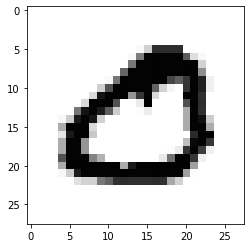

In [4]:
import matplotlib.pyplot as plt
image_index = 7777 
print(y_train[image_index]) 
plt.imshow(x_train[image_index].reshape(28,28), cmap='Greys')


**Reshaping and Normalizing the Images**

We all know that to use Keras API, we will need to have 4-dimension numpy arrays. But we see from the above code result we have 3-dimension numpy array. So, if you take a look at the code below, the first three lines explain how we can convert 3-dims to 4-dims. The next two lines are basically to have floating values after the division. Now coming to the normalzing part, we will always we to do this in our neural networks. This can be done by the last two lines of the code(before print statements) and all we need to do is we need to divide it by 255 (which is the maximum RGB code minus the minimum RGB code).


In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (63000, 28, 28, 1)
Number of images in x_train 63000
Number of images in x_test 7000



**Building the Convolutional Neural Network**

So we are creating our model by used Keras API and hence it will either have Tensorflow or Theano in backend. Therefore, I will import the Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers. To understand better, Dropout layers fight with the overfitting by disregarding some of the neurons while training while Flatten layers flatten 2D arrays to 1D array before building the fully connected layers. Please follow the below code on how to do it: ***You can play around with kernel size, pool size, activation functions, dropout rate, and number of neurons in the first Dense layer to get a better result.***


**Convolutional Layers**

The convolutional layer is the very first layer where we extract features from the images in our datasets. Due to the fact that pixels are only related to the adjacent and close pixels, convolution allows us to preserve the relationship between different parts of an image. Convolution is basically filtering the image with a smaller pixel filter to decrease the size of the image without losing the relationship between pixels. When we apply convolution to 5x5 image by using a 3x3 filter with 1x1 stride (1-pixel shift at each step). We will end up having a 3x3 output (64% decrease in complexity).

**Pooling Layer**

When constructing CNNs, it is common to insert pooling layers after each convolution layer to reduce the spatial size of the representation to reduce the parameter counts which reduces the computational complexity. In addition, pooling layers also helps with the overfitting problem. Basically we select a pooling size to reduce the amount of the parameters by selecting the maximum, average, or sum values inside these pixels.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()

model.add(Conv2D(28, kernel_size=(2,2), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(84, kernel_size=(2,2), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Dropout(0.1))
#model.add(Conv2D(112, kernel_size=(2,2), input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#Third was 4 * 28

model.add(Flatten())
#sigmoid
#gelu
#swish

activation = tf.nn.swish
#2 FC 128 Unit model #17
#3 FC 64 128 256 model #18
#model.add(Dense(64, activation=activation))
model.add(Dense(128, activation=activation))
#model.add(Dense(256, activation=activation))


# 10 is the no of classes
model.add(Dense(10,activation=tf.nn.softmax))


**Compiling and Fitting the Model**

We created an non-optimized empty CNN using the above code.Now we have to set an optimizer with a given loss function which uses a metric. Then, we can fit the model by using our train data. You can play around with the optimizer, loss function, metrics, and epochs.I can say that adam optimizer is usually out-performs the other optimizers, that's why I used that. You might think that Epoch number is a bit less, but in our cases it gives us a pretty amazing accuracy. Since the dataset we have does not require heavy computing power, you can play around with epoch numbers as well. Please follow the below code to have a better understanding.


In [7]:
import keras

#Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the updates.
#Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#Adamax is sometimes superior to adam, specially in models with embeddings.
#Gradient descent (with momentum) optimizer.

#optimizer = keras.optimizers.Adagrad(learning_rate=0.001)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
#optimizer = keras.optimizers.Adamax(learning_rate=0.001)
#optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10, batch_size=32)


Epoch 1/10
1969/1969 [==============================] - 31s 12ms/step - loss: 0.2786 - accuracy: 0.9182
Epoch 2/10
1969/1969 [==============================] - 23s 12ms/step - loss: 0.0449 - accuracy: 0.9864
Epoch 3/10
1969/1969 [==============================] - 24s 12ms/step - loss: 0.0263 - accuracy: 0.9917
Epoch 4/10
1969/1969 [==============================] - 25s 12ms/step - loss: 0.0167 - accuracy: 0.9946
Epoch 5/10
1969/1969 [==============================] - 26s 13ms/step - loss: 0.0138 - accuracy: 0.9953
Epoch 6/10
1969/1969 [==============================] - 26s 13ms/step - loss: 0.0109 - accuracy: 0.99621s - loss: 0.0108 - accuracy: 0.99 - ETA: 1s - loss: 0.0 - ETA: 1s - loss: 0.0109 - accuracy:  - ETA: 0s
Epoch 7/10
1969/1969 [==============================] - 25s 13ms/step - loss: 0.0111 - accuracy: 0.9963
Epoch 8/10
1969/1969 [==============================] - 24s 12ms/step - loss: 0.0081 - accuracy: 0.9972
Epoch 9/10
1969/1969 [==============================] - 26s 13ms


**Evaluating the Model**

Now we can go forward and evaluate the model by the below code. You will see that it has an accuracy of 98.5% and loss is very low. That means that using 10 epoch was a good fit for this use case. As this is a very basic model and our first model, we can consider that the model and the result is very good.


In [8]:
model.evaluate(x_test, y_test)

219/219 [==============================] - 2s 7ms/step - loss: 0.0586 - accuracy: 0.9874


[0.058648522943258286, 0.9874285459518433]



Now you can check if you model is trained well. Change the image_index and run the code to see if the number predicted is accurate or not.


In [9]:
#((Filter_size * 1) + 1) * filter_number
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 28)        140       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 84)        9492      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 84)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 84)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

8


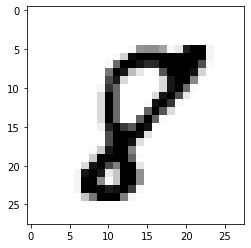

In [10]:
image_index = 2843
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())